# Unit 5 - Financial Planning


In [85]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [86]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [87]:
# Set current amount of crypto assets
my_btc = 10
my_eth = 10

In [88]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [89]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']
print(btc_price)

58101.0


In [90]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(eth_price)

4190.33


In [91]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

In [92]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 10 BTC is $581010.00
The current value of your 10 ETH is $41903.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [93]:
# Current amount of shares
my_spy = 100
my_agg = 100

In [94]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [95]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-08", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stock_request = api.get_barset(tickers,timeframe,start=start_date,end=end_date,limit=1000).df
stock_request.index = stock_request.index.date
# Preview DataFrame
stock_request.tail()

AGG                                          SPY           \
              open    high       low     close   volume    open     high   
2021-05-03  114.40  114.59  114.3300  114.4000  5537985  419.43  419.840   
2021-05-04  114.55  114.70  114.4100  114.5285  4677045  416.08  416.600   
2021-05-05  114.45  114.62  114.4222  114.6100  3861137  417.38  417.630   
2021-05-06  114.55  114.71  114.5300  114.6500  4557111  415.83  419.210   
2021-05-07  114.85  114.97  114.5700  114.6450  6812067  419.89  422.815   

                                       
                low   close    volume  
2021-05-03  417.665  418.18  60956273  
2021-05-04  411.670  415.64  88484568  
2021-05-05  414.940  415.72  51316402  
2021-05-06  413.675  419.08  65397203  
2021-05-07  419.160  422.09  58002195

In [96]:
agg_close_price = stock_request['AGG']['close'].tail(1).item()
agg_close_price

114.645

In [97]:
spy_close_price = stock_request['SPY']['close'].tail(1).item()
spy_close_price

422.09

In [98]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.645
Current SPY closing price: $422.09


In [99]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of my {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of my {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of my 100 SPY shares is $42209.00
The current value of my 100 AGG shares is $11464.50


### Savings Health Analysis

In [100]:
savings_list = [my_spy_value+my_agg_value,my_btc_value+my_eth_value]

In [101]:
savings_list

[53673.5, 622913.3]

In [102]:
# Set monthly household income
household_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(savings_list,columns=['close'],index=['stocks','crypto'])

# Display savings DataFrame
df_savings

,close
stocks,53673.5
crypto,622913.3


array([<AxesSubplot:ylabel='close'>], dtype=object)

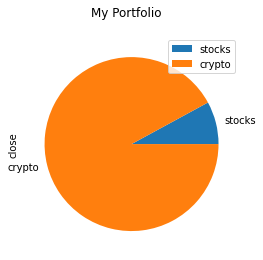

In [103]:
# Plot savings pie chart
#Alternative = df_savings.plot.pie(y="close", title="My Portfolio")
df_savings.plot.pie(title ="My Portfolio",subplots=True)

In [104]:
total_savings.item()

666008.9

In [105]:
# Set ideal emergency fund
emergency_fund = household_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()

# Validate saving health
for money in total_savings:
    if money < emergency_fund:
        print(f"total savings are ${total_savings.item()}. Not enough money! start saving! Need to save an extra ${emergency_fund - total_savings.item()}")
    else:
        print(f"total savings are ${total_savings.item()}. emergency funds are safu. There is a surplus of ${total_savings.item() - emergency_fund}")

total savings are $676586.8. emergency funds are safu. There is a surplus of $640586.8


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [106]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-10', tz='America/New_York').isoformat()

In [107]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_stock_data = api.get_barset(tickers,timeframe,start=start_date,end=end_date,limit=1000).df
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2017-05-18  109.54  109.6299  109.4433  109.550  1873534.0     NaN     NaN   
2017-05-19  109.51  109.5350  109.3520  109.525  1345002.0  237.33  239.08   
2017-05-22  109.43  109.4800  109.4000  109.440  1199164.0  238.90  239.71   
2017-05-23  109.50  109.5300  109.2100  109.240  1194872.0  239.95  240.24   
2017-05-24  109.25  109.5000  109.2115  109.450  2325960.0  240.32  240.73   

                                        
               low   close      volume  
2017-05-18     NaN     NaN         NaN  
2017-05-19  237.27  238.30  69366163.0  
2017-05-22  238.82  239.53  37630972.0  
2017-05-23  239.51  240.02  36771135.0  
2017-05-24  239.93  240.59  37423590.0

In [108]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [109]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-05-18  109.54  109.6299  109.4433  109.550  1873534.0          NaN   
2017-05-19  109.51  109.5350  109.3520  109.525  1345002.0    -0.000228   
2017-05-22  109.43  109.4800  109.4000  109.440  1199164.0    -0.000776   
2017-05-23  109.50  109.5300  109.2100  109.240  1194872.0    -0.001827   
2017-05-24  109.25  109.5000  109.2115  109.450  2325960.0     0.001922   

               SPY                                                   
              open    high     low   close      volume daily_return  
2017-05-18     NaN     NaN     NaN     NaN         NaN          NaN  
2017-05-19  237.33  239.08  237.27  238.30  69366163.0          NaN  
2017-05-22  238.90  239.71  238.82  239.53  37630972.0     0.005162  
2017-05-23  239.95  240.24  239.51  240.02  36771135.0     0.002046  
2017-05-24  240.32  240.73  239.93  240.59  37423590.0     0.002375

In [79]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008259,0.999240,0.998069,1.004530,1.007528,1.010155,1.003625,1.000526,0.993145,0.998352,...,0.998849,1.003510,1.004643,1.002562,0.986729,1.002474,0.997828,0.997065,1.002769,1.005390
2,1.000377,1.008059,1.008224,1.005803,1.006160,1.003973,1.014311,0.995330,0.974782,0.997117,...,1.003863,1.003043,0.999791,1.002347,0.984393,0.998195,0.998805,1.002555,1.004939,0.997046
3,0.997534,1.006491,1.008909,1.000814,1.001717,1.008365,1.006090,1.010774,0.969881,0.992079,...,1.005149,0.996883,1.016995,1.007805,0.966508,1.004138,1.002205,1.002985,1.004127,0.994557
4,1.002676,1.008539,1.012701,1.008773,1.007119,1.005465,1.005865,1.015445,0.969914,0.987099,...,1.003245,0.988255,1.031078,1.003801,0.958238,1.006990,0.994450,1.011326,1.007104,0.992989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,425.082946,291.900949,566.388166,867.818027,819.144928,1501.487427,407.025931,450.223150,625.022380,421.493373,...,505.356359,1178.226484,327.768815,547.887650,1070.307400,849.122010,2295.526709,316.746646,472.164800,988.691315
7557,421.257004,290.362278,567.267647,868.435309,817.360611,1492.170049,406.898525,446.056362,632.156389,421.453460,...,505.843669,1171.170580,329.589085,551.481096,1067.839585,848.584435,2293.637981,319.195177,473.893796,992.216255
7558,423.008993,290.969893,566.080372,862.162223,816.597245,1494.184404,405.118783,441.131739,630.083242,421.688924,...,506.957774,1170.944392,327.867544,558.138806,1061.429544,856.901119,2297.598472,323.622563,475.589336,986.028555
7559,424.720307,293.329046,563.967843,855.563478,820.645009,1492.670358,405.148877,435.595960,634.640145,420.655375,...,503.046310,1164.311227,326.873658,560.931933,1062.608263,851.794461,2257.351298,324.897060,479.703075,987.553261


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

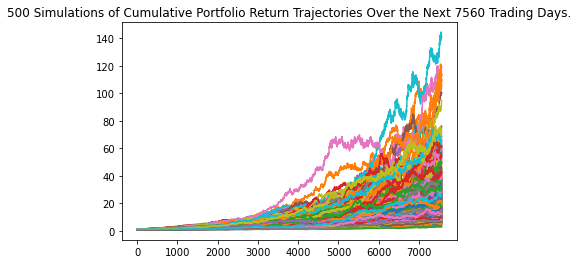

In [110]:
# Plot simulation outcomes
plot = MC_even_dist.plot_simulation()

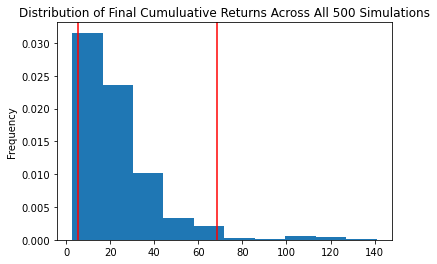

In [112]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [113]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean             23.678100
std              18.707658
min               2.727722
25%              11.514168
50%              18.057630
75%              30.016710
max             140.863754
95% CI Lower      5.443651
95% CI Upper     68.585710
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [116]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]* initial_investment,2)
ci_upper = round(even_tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34212.38 and $72514.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [117]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]* initial_investment,2)
ci_upper = round(even_tbl[9]* initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51318.57 and $108771.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [118]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [119]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005160,1.000982,1.006584,0.983556,0.991454,0.998029,0.998771,0.997462,0.988689,1.000992,...,1.010648,1.008105,0.991695,1.000008,1.002622,1.006178,1.002023,1.006901,1.002366,0.984739
2,1.004141,0.994386,1.018145,0.992407,1.003683,1.002938,1.001810,1.006614,0.988827,1.002948,...,1.006305,1.011117,0.998244,0.997638,0.998048,1.016462,1.003951,1.015133,1.002098,0.995437
3,0.999566,1.008349,1.015779,0.999405,0.998712,1.006917,0.999581,1.003634,1.003711,1.007066,...,0.997786,1.007088,1.006904,0.997053,1.022462,1.026036,1.001189,1.017944,1.002938,1.000549
4,1.012093,1.009737,1.010921,0.992883,1.005899,0.994930,0.997681,1.014699,1.010062,1.002239,...,1.000192,0.996168,1.016693,0.997145,1.019660,1.031241,0.999218,1.018686,1.007646,1.012740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.715952,9.460990,30.205155,16.633799,24.563273,16.440439,19.050616,18.371573,3.034732,30.890340,...,6.472065,18.570207,14.980399,26.889796,15.452289,20.069708,22.417939,15.185942,45.141610,19.707722
7557,8.714852,9.557551,30.467896,16.697558,24.577432,16.539043,19.123347,18.407363,3.091460,30.826789,...,6.490257,18.524923,15.038066,26.824029,15.437473,20.033412,22.502596,15.257306,44.807488,19.799715
7558,8.689173,9.518299,30.148714,16.881771,24.713769,16.701568,19.084958,18.461855,3.104639,30.717282,...,6.450867,18.500549,14.723782,26.898261,15.432508,20.011937,22.663407,15.318030,44.913629,19.644564
7559,8.735564,9.536575,30.312960,16.796630,24.963578,16.763330,19.031618,18.278312,3.096530,30.396630,...,6.452862,18.740298,14.693643,26.850416,15.551283,20.303693,22.297376,15.205691,45.079878,19.539964


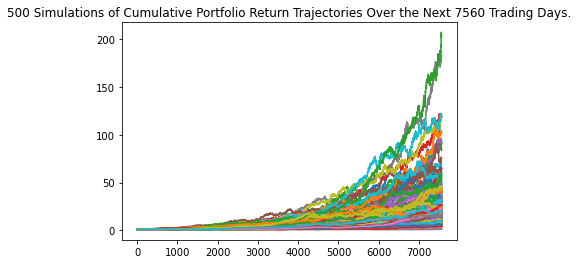

In [120]:
# Plot simulation outcomes
plot_5y = MC_even_dist.plot_simulation()

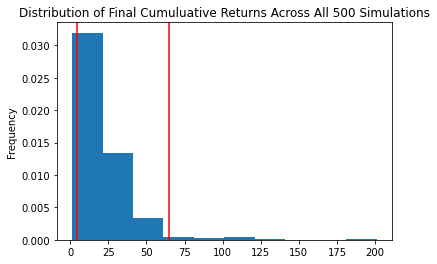

In [121]:
# Plot probability distribution and confidence intervals
dist_plot_5y = MC_even_dist.plot_distribution()

In [122]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5y = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_5y)

count           500.000000
mean             22.054190
std              19.972741
min               1.271939
25%              10.487263
50%              16.790627
75%              26.283524
max             200.956384
95% CI Lower      4.731283
95% CI Upper     64.664590
Name: 7560, dtype: float64


In [130]:
# Set initial investment
initial_investment_5y = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]* initial_investment_5y,2)
ci_upper_five = round(even_tbl[9]* initial_investment_5y,2)

# Print results
print(f"With 50% bonds and 50% stocks, there is a 95% chance that an initial investment of ${initial_investment_5y} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

With 50% bonds and 50% stocks, there is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $85530.94 and $181286.02


### Ten Years Retirement Option

In [124]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [125]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984791,1.007529,0.991861,1.001051,0.999297,1.003827,0.994899,1.005215,0.999135,1.006328,...,0.997226,1.019523,0.989091,1.001977,0.991809,0.998232,0.999351,1.010843,1.001876,1.005132
2,0.992794,1.014755,1.000273,1.008003,0.995724,1.006596,0.997989,1.019476,0.988475,1.012357,...,0.993185,1.022639,0.989281,1.001949,0.988134,0.999101,0.997353,1.018625,0.988370,0.995523
3,1.006318,0.997550,1.005581,1.023727,0.993756,1.009756,0.985309,1.024811,0.985194,1.018166,...,0.998291,1.017684,0.989455,0.984342,0.994934,1.004113,0.995117,1.013077,0.978981,0.986257
4,1.010379,1.001968,1.014306,1.033988,0.989004,1.012855,0.986462,1.023041,0.974993,1.028236,...,0.988391,1.016531,0.983764,0.992204,0.998453,1.004668,0.998775,1.005470,0.968623,0.976786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,41.835246,20.551997,42.778432,12.083916,17.462237,23.745626,3.459935,13.319716,22.919485,25.127386,...,33.417597,11.442560,12.397414,39.738126,29.922007,37.440945,5.648472,36.263012,6.365238,32.012226
7557,41.972230,20.398882,42.719677,12.070573,17.401055,23.765476,3.426484,13.285059,22.959637,25.020339,...,33.858920,11.518925,12.427977,39.748465,29.858498,37.525662,5.656057,36.185378,6.341362,32.269432
7558,42.171925,20.370042,42.533696,12.135431,17.557510,23.716949,3.420141,13.454703,22.791851,25.047518,...,34.244690,11.485472,12.367221,39.618721,29.946924,37.618158,5.653443,35.935402,6.355304,32.384122
7559,43.005515,20.498314,43.239278,12.312677,17.327653,23.940979,3.452535,13.513622,22.854602,24.872054,...,34.319181,11.387866,12.333120,39.462791,30.027131,37.125000,5.641872,36.092748,6.347569,32.467944


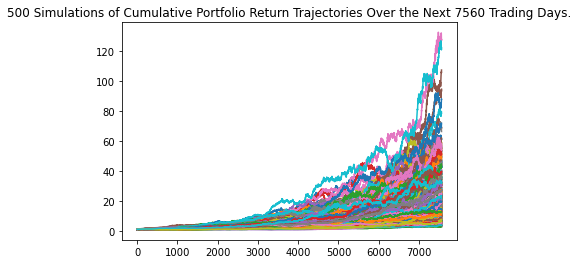

In [126]:
# Plot simulation outcomes
plot_10y = MC_even_dist.plot_simulation()

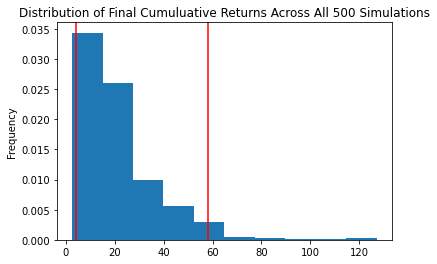

In [127]:
# Plot probability distribution and confidence intervals
dist_plot_10y = MC_even_dist.plot_distribution()

In [128]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10y = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_10y)

count           500.000000
mean             22.068450
std              16.380722
min               2.549057
25%              11.381331
50%              17.801148
75%              27.342902
max             127.115944
95% CI Lower      4.083208
95% CI Upper     58.248318
Name: 7560, dtype: float64


In [131]:
# Set initial investment
initial_investment_10y = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]* initial_investment_10y,2)
ci_upper_ten = round(even_tbl[9]* initial_investment_10y,2)

# Print results
print(f"With 10% bonds and 90% stocks, there is a 95% chance that an initial investment of ${initial_investment_10y} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

With 10% bonds and 90% stocks, there is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $34212.38 and $72514.41
